In [41]:
from scipy.sparse import rand
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Data Generation
##### 1a) Here I have used random.choice method to generate ratings 1 to7 in equal distribution in such a way that 200 out of 500 will be having ratings from 1 to 7. Considering empty ratings as 0 and so it's distribution is 0.6 which accumulates for 300 entries out of 500 with random seed

In [2]:
data = np.random.RandomState(43).choice([0,1,2,3,4,5,6,7],500,p=[0.6,.4/7,.4/7,.4/7,.4/7,.4/7,.4/7,.4/7])
len(data)
np.count_nonzero(data)

201

In [3]:
data.resize(25,20)
data

array([[0, 1, 0, 0, 0, 5, 2, 0, 0, 3, 0, 4, 0, 0, 5, 0, 0, 0, 0, 5],
       [5, 7, 0, 7, 0, 2, 0, 6, 0, 0, 0, 0, 0, 1, 7, 6, 6, 0, 0, 0],
       [7, 0, 5, 2, 1, 0, 6, 0, 0, 7, 3, 0, 0, 0, 3, 0, 2, 2, 1, 0],
       [0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 7, 0, 6, 0],
       [0, 7, 7, 0, 0, 0, 0, 0, 0, 1, 5, 5, 7, 3, 0, 0, 6, 0, 0, 1],
       [0, 0, 0, 0, 3, 3, 6, 4, 0, 6, 0, 5, 6, 5, 0, 0, 0, 2, 0, 0],
       [1, 0, 3, 0, 0, 0, 7, 2, 0, 0, 0, 3, 6, 0, 0, 3, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 0, 6, 2, 7, 0, 0],
       [7, 0, 0, 6, 0, 0, 6, 0, 7, 7, 0, 0, 7, 7, 0, 0, 0, 2, 1, 2],
       [7, 2, 0, 0, 0, 4, 0, 0, 2, 0, 1, 0, 4, 0, 0, 5, 7, 0, 0, 7],
       [7, 6, 5, 0, 0, 0, 0, 6, 1, 7, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 5, 0, 0, 0, 0, 6, 0, 4, 5, 0, 0, 4],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 2, 3, 0, 0, 0, 7, 4, 7, 6, 0],
       [0, 1, 0, 0, 0, 0, 0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 6, 0],
       [4, 5, 0, 1, 4, 6, 0, 4, 0,

##### Data in Tabular form (default index and column names)

In [4]:
from pandas import *
print(DataFrame(data))

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   0   5   2   0   0   3   0   4   0   0   5   0   0   0   
1    5   7   0   7   0   2   0   6   0   0   0   0   0   1   7   6   6   0   
2    7   0   5   2   1   0   6   0   0   7   3   0   0   0   3   0   2   2   
3    0   0   4   0   1   0   0   0   0   0   0   0   3   3   2   0   7   0   
4    0   7   7   0   0   0   0   0   0   1   5   5   7   3   0   0   6   0   
5    0   0   0   0   3   3   6   4   0   6   0   5   6   5   0   0   0   2   
6    1   0   3   0   0   0   7   2   0   0   0   3   6   0   0   3   0   0   
7    0   0   0   0   0   0   0   0   0   0   5   0   4   0   0   6   2   7   
8    7   0   0   6   0   0   6   0   7   7   0   0   7   7   0   0   0   2   
9    7   2   0   0   0   4   0   0   2   0   1   0   4   0   0   5   7   0   
10   7   6   5   0   0   0   0   6   1   7   2   0   0   0   0   0   0   2   
11   0   1   0   2   0   0   0   0   5   0   0   0   0   6   0  

* As data contains 201 non-zero elements making one element as 0 so that data will have exactly 200 non-zero ratings

In [5]:
data[24][3]=0

#### Checking each row and each column is having atleast 3 non-zero or rating between 1 to 7

In [6]:
columns1 = (data != 0).sum(0)
rows1    = (data != 0).sum(1)
print(columns1)
print(rows1)

[11 12  9  7  9  8 11 10 10 12  8  7 13 12  9 16 12  9  7  8]
[ 7  9 11  7  9  9  8  5 10  9  8  7  7  5  9  9 11  6  8  7  9  9  6  7
  8]


In [7]:
sparsity = float(len(data.nonzero()[0]))
sparsity /= (data.shape[0] * data.shape[1])
sparsity *= 100
print('Sparsity: ',format(sparsity))

Sparsity:  40.0


In [8]:
def train_test_split(ratings,seed):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.RandomState(seed).choice(ratings[user, :].nonzero()[0], 
                                        size=10)
        train[user, test_ratings] = 0
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

#### 1b) Randomly selecting 150 of the 200 ratings as the training dataset and the remaining 50 as the test dataset.

In [9]:
ts1,tr1=train_test_split(data,44)

In [10]:
np.count_nonzero(ts1)

50

In [11]:
np.count_nonzero(tr1)

150

In [12]:
columns1 = (tr1 != 0).sum(0)
rows1    = (tr1 != 0).sum(1)
print(columns1)
print(rows1)

[11 12  7  3  8  7  6  9  8 10  5  6  6  7  7 10 11  8  5  4]
[6 6 7 6 6 6 6 5 6 6 6 6 6 5 6 6 7 6 6 6 6 6 6 6 6]


In [13]:
columns1 = (ts1 != 0).sum(0)
rows1    = (ts1 != 0).sum(1)
print(columns1)
print(rows1)

[0 0 2 4 1 1 5 1 2 2 3 1 7 5 2 6 1 1 2 4]
[1 3 4 1 3 3 2 0 4 3 2 1 1 0 3 3 4 0 2 1 3 3 0 1 2]


#### Test Data in tabular form

In [14]:
print(DataFrame(ts1))

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1    0   0   0   7   0   0   0   0   0   0   0   0   0   1   7   0   0   0   
2    0   0   0   2   0   0   0   0   0   7   3   0   0   0   0   0   0   2   
3    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4    0   0   0   0   0   0   0   0   0   1   0   0   7   3   0   0   0   0   
5    0   0   0   0   0   0   6   0   0   0   0   5   6   0   0   0   0   0   
6    0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   3   0   0   
7    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   6   0   0   0   0   0   7   7   0   0   0   0   
9    0   0   0   0   0   4   0   0   0   0   0   0   4   0   0   5   0   0   
10   0   0   5   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

#### Train Data in tabular form

In [15]:
print(DataFrame(tr1))

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   0.0  1.0  0.0  0.0  0.0  5.0  2.0  0.0  0.0  3.0  0.0  4.0  0.0  0.0  5.0   
1   5.0  7.0  0.0  0.0  0.0  2.0  0.0  6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   7.0  0.0  5.0  0.0  1.0  0.0  6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0   
3   0.0  0.0  4.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  3.0  2.0   
4   0.0  7.0  7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  5.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  3.0  3.0  0.0  4.0  0.0  6.0  0.0  0.0  0.0  5.0  0.0   
6   1.0  0.0  3.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  3.0  6.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  4.0  0.0  0.0   
8   7.0  0.0  0.0  6.0  0.0  0.0  0.0  0.0  7.0  7.0  0.0  0.0  0.0  0.0  0.0   
9   7.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0  0.0  0.0  0.0   
10  7.0  6.0  0.0  0.0  0.0  0.0  0.0  6.0  1.0  7.0  0.0  0.0  0.0  0.0  0.0   
11  0.0  1.0  0.0  2.0  0.0 

#### Functions to implement Matrix factorisation using Alternating Least Squares and SGD 

#### Note:
    * From link -http://www.diva-portal.se/smash/get/diva2:929350/FULLTEXT01.pdf, to solve for the solution of problem (2.2) one can fix either P or Q for the optimal solution.
    * Both ALS and SGD starts by initializing Q and P with random values, thus the results will not be the same when running multiple times.
    * ALS tries to solve 2.2 by alternating between holding P and Q fixed untilconvergence. By doing so the iterations are able to run independently which can potentially speed up the computations by using multiple cores.
    * In SGD, for each iteration pick a random rating Su,i and update Q and P according to these formulae of eq 2.5 & 2.6.
    * Hyperparameter       | SGD                 | ALS
    -----------------------------------------------------------
      Learning rate        | Between1 0.02 – 0.06| Unsupported
      Linear regularization| 1e-10               |1e-10  
      Regularization(⁄)    | 1e-8                |1e-8
    

In [20]:
#np.transpose(np.nonzero(ts1))
from numpy.linalg import solve

class ExplicitMF():
    def __init__(self, 
                 ratings,
                 n_factors=40,
                 learning='sgd',
                 item_fact_reg=0.0, 
                 user_fact_reg=0.0,
                 item_bias_reg=0.0,
                 user_bias_reg=0.0,
                 verbose=False):
        """
        Train a matrix factorization model to predict empty 
        entries in a matrix. The terminology assumes a 
        ratings matrix which is ~ user x item
        
        Params
        ======
        ratings : (ndarray)
            User x Item matrix with corresponding ratings
        
        n_factors : (int)
            Number of latent factors to use in matrix 
            factorization model
        learning : (str)
            Method of optimization. Options include 
            'sgd' or 'als'.
        
        item_fact_reg : (float)
            Regularization term for item latent factors
        
        user_fact_reg : (float)
            Regularization term for user latent factors
            
        item_bias_reg : (float)
            Regularization term for item biases
        
        user_bias_reg : (float)
            Regularization term for user biases
        
        verbose : (bool)
            Whether or not to printout training progress
        """
        
        self.ratings = ratings
        self.n_users, self.n_items = ratings.shape
        self.n_factors = n_factors
        self.item_fact_reg = item_fact_reg
        self.user_fact_reg = user_fact_reg
        self.item_bias_reg = item_bias_reg
        self.user_bias_reg = user_bias_reg
        self.learning = learning
        if self.learning == 'sgd':
            self.sample_row, self.sample_col = self.ratings.nonzero()
            self.n_samples = len(self.sample_row)
        self._v = verbose

    def als_step(self,
                 latent_vectors,
                 fixed_vecs,
                 ratings,
                 _lambda,
                 type='user'):
        """
        One of the two ALS steps. Solve for the latent vectors
        specified by type.
        """
        if type == 'user':
            # Precompute
            YTY = fixed_vecs.T.dot(fixed_vecs)
            lambdaI = np.eye(YTY.shape[0]) * _lambda

            for u in range(latent_vectors.shape[0]):
                latent_vectors[u, :] = solve((YTY + lambdaI), 
                                             ratings[u, :].dot(fixed_vecs))
        elif type == 'item':
            # Precompute
            XTX = fixed_vecs.T.dot(fixed_vecs)
            lambdaI = np.eye(XTX.shape[0]) * _lambda
            
            for i in range(latent_vectors.shape[0]):
                latent_vectors[i, :] = solve((XTX + lambdaI), 
                                             ratings[:, i].T.dot(fixed_vecs))
        return latent_vectors

    def train(self, n_iter=10, learning_rate=0.1):
        """ Train model for n_iter iterations from scratch."""
        # initialize latent vectors        
        self.user_vecs = np.random.normal(scale=1./self.n_factors,\
                                          size=(self.n_users, self.n_factors))
        self.item_vecs = np.random.normal(scale=1./self.n_factors,
                                          size=(self.n_items, self.n_factors))
        
        if self.learning == 'als':
            self.partial_train(n_iter)
        elif self.learning == 'sgd':
            self.learning_rate = learning_rate
            self.user_bias = np.zeros(self.n_users)
            self.item_bias = np.zeros(self.n_items)
            self.global_bias = np.mean(self.ratings[np.where(self.ratings != 0)])
            self.partial_train(n_iter)
    
    
    def partial_train(self, n_iter):
        """ 
        Train model for n_iter iterations. Can be 
        called multiple times for further training.
        """
        ctr = 1
        while ctr <= n_iter:
            if ctr % 10 == 0 and self._v:
                print('\tcurrent iteration:'+str(ctr))
            if self.learning == 'als':
                self.user_vecs = self.als_step(self.user_vecs, 
                                               self.item_vecs, 
                                               self.ratings, 
                                               self.user_fact_reg, 
                                               type='user')
                self.item_vecs = self.als_step(self.item_vecs, 
                                               self.user_vecs, 
                                               self.ratings, 
                                               self.item_fact_reg, 
                                               type='item')
            elif self.learning == 'sgd':
                self.training_indices = np.arange(self.n_samples)
                np.random.shuffle(self.training_indices)
                self.sgd()
            ctr += 1

    def sgd(self):
        for idx in self.training_indices:
            u = self.sample_row[idx]
            i = self.sample_col[idx]
            prediction = self.predict(u, i)
            e = (self.ratings[u,i] - prediction) # error
            
            # Update biases
            self.user_bias[u] += self.learning_rate * \
                                (e - self.user_bias_reg * self.user_bias[u])
            self.item_bias[i] += self.learning_rate * \
                                (e - self.item_bias_reg * self.item_bias[i])
            
            #Update latent factors
            self.user_vecs[u, :] += self.learning_rate * \
                                    (e * self.item_vecs[i, :] - \
                                     self.user_fact_reg * self.user_vecs[u,:])
            self.item_vecs[i, :] += self.learning_rate * \
                                    (e * self.user_vecs[u, :] - \
                                     self.item_fact_reg * self.item_vecs[i,:])
    def predict(self, u, i):
        """ Single user and item prediction."""
        if self.learning == 'als':
            return self.user_vecs[u, :].dot(self.item_vecs[i, :].T)
        elif self.learning == 'sgd':
            prediction = self.global_bias + self.user_bias[u] + self.item_bias[i]
            prediction += self.user_vecs[u, :].dot(self.item_vecs[i, :].T)
            return prediction
    
    def predict_all(self):
        """ Predict ratings for every user and item."""
        predictions = np.zeros((self.user_vecs.shape[0], 
                                self.item_vecs.shape[0]))
        for u in range(self.user_vecs.shape[0]):
            for i in range(self.item_vecs.shape[0]):
                predictions[u, i] = self.predict(u, i)
                
        return predictions
    
    def calculate_learning_curve(self, iter_array, test, learning_rate=0.1):
        """
        Keep track of MSE as a function of training iterations.
        
        Params
        ======
        iter_array : (list)
            List of numbers of iterations to train for each step of 
            the learning curve. e.g. [1, 5, 10, 20]
        test : (2D ndarray)
            Testing dataset (assumed to be user x item).
        
        The function creates two new class attributes:
        
        train_mse : (list)
            Training data MSE values for each value of iter_array
        test_mse : (list)
            Test data MSE values for each value of iter_array
        """
        iter_array.sort()
        self.train_mse =[]
        self.test_mse = []
        iter_diff = 0
        for (i, n_iter) in enumerate(iter_array):
            if self._v:
                print('Iteration:='+str(n_iter))
            if i == 0:
                self.train(n_iter - iter_diff, learning_rate)
            else:
                self.partial_train(n_iter - iter_diff)

            predictions = self.predict_all()

            self.train_mse += [get_mse(predictions, self.ratings)]
            self.test_mse += [get_mse(predictions, test)]
            if self._v:
                print('Train mse: ' + str(self.train_mse[-1]))
                print('Test  mse: ' + str(self.test_mse[-1]))
            iter_diff = n_iter

In [21]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot_learning_curve(iter_array, model):
    plt.plot(iter_array, model.train_mse, \
             label='Training', linewidth=5)
    plt.plot(iter_array, model.test_mse, \
             label='Test', linewidth=5)

    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    plt.xlabel('iterations', fontsize=20);
    plt.ylabel('(total ratings including zeros) MSE', fontsize=20);
    plt.legend(loc='best', fontsize=10);

#### 1c) To find a matrix factorization of the training data and include only two latent factors Using ALS without regularization

In [22]:
MF_ALS = ExplicitMF(tr1, 2, learning='als', verbose=True)
iter_array1 = [1, 5, 50, 100, 200]
MF_ALS.calculate_learning_curve(iter_array1, ts1, learning_rate=0.01)

Iteration:=1
Train mse: 14.583764881645214
Test  mse: 23.625956435732075
Iteration:=5
Train mse: 8.55528494292431
Test  mse: 18.168304550631145
Iteration:=50
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
Train mse: 8.579917562079256
Test  mse: 18.554979109898692
Iteration:=100
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
Train mse: 8.57991971138061
Test  mse: 18.554988356364504
Iteration:=200
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
	current iteration:60
	current iteration:70
	current iteration:80
	current iteration:90
	current iteration:100
Train mse: 8.579919711399462
Test  mse: 18.554988356445598


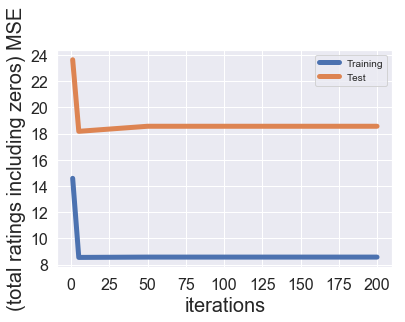

In [23]:
plot_learning_curve(iter_array1, MF_ALS)

#### 1d) Calculating MSE  by considering only test data and also considering only non-zero elements of that test data

In [35]:
list1_org=[]
list2_pred=[]
predictions = np.zeros((len(ts1), len(ts1[0])),dtype=object)
ts1_pred=ts1.copy();
for u in range(len(ts1)):
    for i in range(len(ts1[0])):
        if ts1[u][i]!=0:
            list1_org.append(round(MF_ALS.predict(u,i),2))
            list2_pred.append(ts1[u][i])
            predictions[u][i]=str(ts1[u][i])+' | '+str(round(MF_ALS.predict(u,i),2))
print("TEST DATA Ratings MSE Using ALS without regularization "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA Ratings MSE Using ALS without regularization 18.55587


#### 1d) Printing predictions and original ratings of non-zero ratings of test data side by side (left side--> original and right side of pipe is predicted value)

In [26]:
predictions

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        '5 | 0.38'],
       [0, 0, 0, '7 | 0.39', 0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 0.9',
        '7 | 1.68', 0, 0, 0, 0, 0],
       [0, 0, 0, '2 | -0.04', 0, 0, 0, 0, 0, '7 | 0.4', '3 | 1.32', 0, 0,
        0, 0, 0, 0, '2 | 1.56', 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '6 | 0.41',
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | -1.29', 0, 0, '7 | 0.1',
        '3 | -0.96', 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '6 | -0.6', 0, 0, 0, 0, '5 | -0.36',
        '6 | 1.34', 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | 0.69', 0, 0, 0, 0, 0, 0, 0, 0, '3 | 1.03',
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '6 | -0.68', 0, 0, 0, 0, 0, '7 | 1.75',
        '7 | 3.07', 0, 0, 0, 0, 0, '2 | -0.28'],
       [0, 0, 0, 0, 0, '4 | 1.86', 0, 0, 0, 0, 0, 0, '4 | 0.48', 0, 0,
        '5 | 2.15', 0, 0, 0, 0],
       [0, 0, '5 | 

#### To find a matrix factorization of the training data and include only two latent factors Using ALS with regularization

In [27]:
MF_ALS2 = ExplicitMF(tr1, n_factors=2, \
                    user_fact_reg=1, item_fact_reg=1)

iter_array2 = [1, 2, 5, 10, 25, 50, 100]
MF_ALS2.calculate_learning_curve(iter_array2, ts1)

In [36]:
list1_org=[]
list2_pred=[]
predictions = np.zeros((len(ts1), len(ts1[0])),dtype=object)
ts1_pred=ts1.copy();
for u in range(len(ts1)):
    for i in range(len(ts1[0])):
        if ts1[u][i]!=0:
            list1_org.append(round(MF_ALS2.predict(u,i),2))
            list2_pred.append(ts1[u][i])
            predictions[u][i]=str(ts1[u][i])+' | '+str(round(MF_ALS2.predict(u,i),2))
print("TEST DATA Ratings MSE Using ALS with regularization "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA Ratings MSE Using ALS with regularization 6.906573999999999


#### Predictions of test data using vectors obtained by considering regularization for ALS

In [30]:
predictions

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        '5 | 2.07'],
       [0, 0, 0, '7 | 6.07', 0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 6.56',
        '7 | 6.15', 0, 0, 0, 0, 0],
       [0, 0, 0, '2 | 3.97', 0, 0, 0, 0, 0, '7 | 4.74', '3 | 1.54', 0, 0,
        0, 0, 0, 0, '2 | 2.06', 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '6 | 1.41',
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 7.41', 0, 0, '7 | 6.19',
        '3 | 7.34', 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '6 | 5.54', 0, 0, 0, 0, '5 | 3.23', '6 | 4.4',
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | 4.32', 0, 0, 0, 0, 0, 0, 0, 0, '3 | 3.24',
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '6 | 6.96', 0, 0, 0, 0, 0, '7 | 5.06',
        '7 | 6.24', 0, 0, 0, 0, 0, '2 | 2.51'],
       [0, 0, 0, 0, 0, '4 | 5.56', 0, 0, 0, 0, 0, 0, '4 | 6.24', 0, 0,
        '5 | 5.16', 0, 0, 0, 0],
       [0, 0, '5 | 5.97

#### To find a matrix factorization of the training data and include only two latent factors Using SGD

In [31]:
MF_SGD = ExplicitMF(tr1, 2, learning='sgd', verbose=True)
iter_array = [1, 2, 5, 10, 25, 50, 100, 200]
MF_SGD.calculate_learning_curve(iter_array, ts1, learning_rate=0.001)

Iteration:=1
Train mse: 4.195871507930667
Test  mse: 4.643430457174636
Iteration:=2
Train mse: 4.171717388845075
Test  mse: 4.636769086176312
Iteration:=5
Train mse: 4.101454487684428
Test  mse: 4.617592047357322
Iteration:=10
Train mse: 3.9910891705179656
Test  mse: 4.588195518323753
Iteration:=25
	current iteration:10
Train mse: 3.702901639071473
Test  mse: 4.516362794083029
Iteration:=50
	current iteration:10
	current iteration:20
Train mse: 3.32804391285417
Test  mse: 4.437677739380121
Iteration:=100
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
Train mse: 2.802844725907474
Test  mse: 4.3697558745254925
Iteration:=200
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
	current iteration:60
	current iteration:70
	current iteration:80
	current iteration:90
	current iteration:100
Train mse: 2.104254694641882
Test  mse: 4.385814342898085


In [39]:
list1_org=[]
list2_pred=[]
sgd_predictions = np.zeros((len(ts1), len(ts1[0])),dtype=object)
ts1_pred=ts1.copy();
for u in range(len(ts1)):
    for i in range(len(ts1[0])):
        if ts1[u][i]!=0:
            list1_org.append(round(MF_SGD.predict(u,i),2))
            list2_pred.append(ts1[u][i])
            sgd_predictions[u][i]=str(ts1[u][i])+' | '+str(round(MF_SGD.predict(u,i),2))
print("TEST DATA Ratings MSE Using SGD "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA Ratings MSE Using SGD 4.385426


#### Predictions of test data using SGD

In [40]:
sgd_predictions

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        '5 | 2.73'],
       [0, 0, 0, '7 | 5.56', 0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 3.75',
        '7 | 5.65', 0, 0, 0, 0, 0],
       [0, 0, 0, '2 | 4.16', 0, 0, 0, 0, 0, '7 | 5.27', '3 | 2.44', 0, 0,
        0, 0, 0, 0, '2 | 2.59', 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '6 | 3.51',
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 5.4', 0, 0, '7 | 4.76',
        '3 | 3.68', 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '6 | 4.96', 0, 0, 0, 0, '5 | 3.51', '6 | 4.52',
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | 4.51', 0, 0, 0, 0, 0, 0, 0, 0, '3 | 3.15',
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '6 | 5.5', 0, 0, 0, 0, 0, '7 | 5.69',
        '7 | 6.03', 0, 0, 0, 0, 0, '2 | 4.0'],
       [0, 0, 0, 0, 0, '4 | 4.7', 0, 0, 0, 0, 0, 0, '4 | 4.61', 0, 0,
        '5 | 3.91', 0, 0, 0, 0],
       [0, 0, '5 | 5.17', 

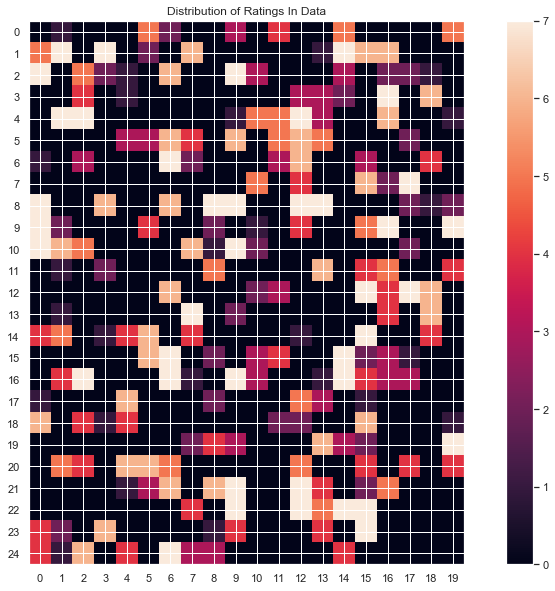

In [48]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.imshow(data)
plt.xticks(range(len(data[0])))
plt.yticks(range(len(data)))
ax = plt.gca()
ax.set_xticklabels(range(len(data[0])))
ax.set_yticklabels(range(len(data)))
plt.title("Distribution of Ratings In Data")
plt.colorbar();

#### 2a) Populate the Ratings matrix in step 1.a in such a way (you are free to choose the rating values) that the MSE obtained in 1.d is minimized. Repeat all steps of Q#1 and submit the answers.

Note: Here Assumption is that if we consider all equal ratings, then MSE may decrease which is not practical in real time. Here every user rated the item in similar way and for all movies given same rating.

In [51]:
data_same = np.random.RandomState(43).choice([0,1,2,3,4,5,6,7],500,p=[0.6,0.4,0,0,0,0,0,0])
len(data_same)
np.count_nonzero(data_same)

201

In [52]:
data_same.resize(25,20)

In [53]:
data_same[24][3]=0

In [54]:
ts1_same,tr1_same=train_test_split(data_same,44)

In [55]:
np.count_nonzero(ts1_same)

50

In [56]:
MF_ALS_same = ExplicitMF(tr1_same, 2, learning='als', verbose=True)
iter_array1 = [1, 5, 50, 100, 200]
MF_ALS_same.calculate_learning_curve(iter_array1, ts1_same, learning_rate=0.01)

Iteration:=1
Train mse: 0.6432517070142811
Test  mse: 0.9767374397558167
Iteration:=5
Train mse: 0.3507550450877766
Test  mse: 0.6181377953927407
Iteration:=50
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
Train mse: 0.3348180654538059
Test  mse: 0.6946923410459895
Iteration:=100
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
Train mse: 0.3348180625659062
Test  mse: 0.6946923712213617
Iteration:=200
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
	current iteration:60
	current iteration:70
	current iteration:80
	current iteration:90
	current iteration:100
Train mse: 0.3348180625659049
Test  mse: 0.694692371221376


In [57]:
list1_org=[]
list2_pred=[]
predictions_same = np.zeros((len(ts1_same), len(ts1_same[0])),dtype=object)
ts1_same_pred=ts1_same.copy();
for u in range(len(ts1_same)):
    for i in range(len(ts1_same[0])):
        if ts1_same[u][i]!=0:
            list1_org.append(round(MF_ALS_same.predict(u,i),2))
            list2_pred.append(ts1_same[u][i])
            predictions_same[u][i]=str(ts1_same[u][i])+' | '+str(round(MF_ALS_same.predict(u,i),2))
print("TEST DATA (50 RATINGS) MSE "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA (50 RATINGS) MSE 0.6953800000000001


In [58]:
predictions_same

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        '1 | 0.22'],
       [0, 0, 0, '1 | 0.13', 0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 0.32',
        '1 | 0.35', 0, 0, 0, 0, 0],
       [0, 0, 0, '1 | 0.03', 0, 0, 0, 0, 0, '1 | 0.17', '1 | 0.45', 0, 0,
        0, 0, 0, 0, '1 | 0.43', 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 0.18',
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | -0.21', 0, 0, '1 | 0.19',
        '1 | -0.24', 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '1 | 0.03', 0, 0, 0, 0, '1 | -0.03',
        '1 | 0.21', 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '1 | 0.3', 0, 0, 0, 0, 0, 0, 0, 0, '1 | 0.31',
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '1 | 0.01', 0, 0, 0, 0, 0, '1 | 0.19',
        '1 | 0.46', 0, 0, 0, 0, 0, '1 | -0.03'],
       [0, 0, 0, 0, 0, '1 | 0.37', 0, 0, 0, 0, 0, 0, '1 | 0.22', 0, 0,
        '1 | 0.33', 0, 0, 0, 0],
       [0, 0, '1 | 

In [59]:
MF_SGD_same = ExplicitMF(tr1_same, 2, learning='sgd', verbose=True)
iter_array1 = [1, 5, 50, 100, 200]
MF_SGD_same.calculate_learning_curve(iter_array1, ts1_same, learning_rate=0.01)

Iteration:=1
Train mse: 0.09676750737306158
Test  mse: 0.09095687529668112
Iteration:=5
Train mse: 0.06449363468043266
Test  mse: 0.07903922797725894
Iteration:=50
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
Train mse: 0.009769679995539612
Test  mse: 0.042971147497439376
Iteration:=100
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
Train mse: 0.0037593381081249292
Test  mse: 0.03146834358646527
Iteration:=200
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
	current iteration:60
	current iteration:70
	current iteration:80
	current iteration:90
	current iteration:100
Train mse: 0.0011807227845635764
Test  mse: 0.022762015170109517


In [60]:
list1_org=[]
list2_pred=[]
sgd_predictions_same = np.zeros((len(ts1_same), len(ts1_same[0])),dtype=object)
ts1_same_pred=ts1_same.copy();
for u in range(len(ts1_same)):
    for i in range(len(ts1_same[0])):
        if ts1_same[u][i]!=0:
            list1_org.append(round(MF_SGD_same.predict(u,i),2))
            list2_pred.append(ts1_same[u][i])
            sgd_predictions_same[u][i]=str(ts1_same[u][i])+' | '+str(round(MF_SGD_same.predict(u,i),2))
print("TEST DATA (50 RATINGS) MSE "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA (50 RATINGS) MSE 0.022809999999999997


In [61]:
sgd_predictions_same

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        '1 | 1.1'],
       [0, 0, 0, '1 | 0.77', 0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 0.94',
        '1 | 0.34', 0, 0, 0, 0, 0],
       [0, 0, 0, '1 | 0.89', 0, 0, 0, 0, 0, '1 | 1.01', '1 | 0.94', 0, 0,
        0, 0, 0, 0, '1 | 1.15', 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 1.14',
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, '1 | 0.96', 0, 0, '1 | 1.01',
        '1 | 0.97', 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '1 | 0.91', 0, 0, 0, 0, '1 | 1.0', '1 | 0.97',
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '1 | 0.95', 0, 0, 0, 0, 0, 0, 0, 0, '1 | 0.96',
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '1 | 0.87', 0, 0, 0, 0, 0, '1 | 1.02',
        '1 | 1.0', 0, 0, 0, 0, 0, '1 | 1.08'],
       [0, 0, 0, 0, 0, '1 | 0.74', 0, 0, 0, 0, 0, 0, '1 | 0.89', 0, 0,
        '1 | 1.01', 0, 0, 0, 0],
       [0, 0, '1 | 1.26',

#### Observations: 
    * Here if we consider all non-zero ratings as same ratings (1 here), we have observed that mse has been drastically dropped to less than 1. Hence the data with same ratings can minimize the MSE calculated in q#1 (mse from 18.55 to 0.69).
    * But also observed that if we consider same rating always the predicted rating will be less than one as this may be due to empty ratings here are considered to be 0 ratings and training model get dominated by 0 ratings and there is no much variance between data making it to always predict to a value less than 0 but good thing here is mse is minimized.
    * Practically this type of data doesn't exist in real world (i.e., giving same rating to all items by all users) but to get most minimised mse we have considered this case.

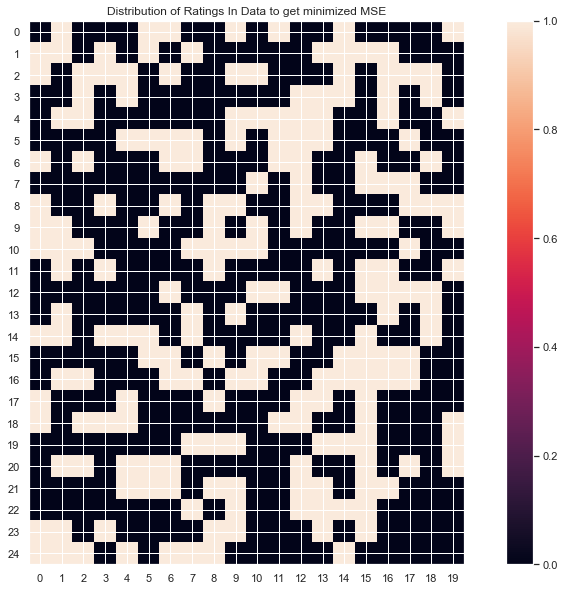

In [62]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.imshow(data_same)
plt.xticks(range(len(data_same[0])))
plt.yticks(range(len(data_same)))
ax = plt.gca()
ax.set_xticklabels(range(len(data_same[0])))
ax.set_yticklabels(range(len(data_same)))
plt.title("Distribution of Ratings In Data to get minimized MSE")
plt.colorbar();

#### 3a) Now populate the Ratings matrix in such a way that the MSE obtained in 1.d is maximized.

#### Assumptions:
    * Considering data with more variance that is ratings are varied such a way that for same item few users gives best rating and other giving worst rating making to have more variance will yield maximise MSE
    * To generate this type of data we need to consider ratings in such a way that their distribution is not uniform. Here I have considered 0.6 percent of data wil be empty ratings, 1,2,3,5,6 have 0.0 distribution and 4 rating will be in 0.2 and 7 rating will be in 0.15 percent of toatl data.

In [67]:
data_diff = np.random.RandomState(43).choice([0,1,2,3,4,5,6,7],500,p=[0.6,0.01,0.01,0.01,0.2,0.01,0.01,0.15])
len(data_diff)
np.count_nonzero(data_diff)

201

In [68]:
data_diff.resize(25,20)

In [69]:
data_diff[24][3]=0

In [70]:
ts1_diff,tr1_diff=train_test_split(data_diff,44)

In [71]:
np.count_nonzero(ts1_diff)

50

In [72]:
MF_ALS_diff = ExplicitMF(tr1_diff, 2, learning='als', verbose=True)
iter_array1 = [1, 5, 50, 100, 200]
MF_ALS_diff.calculate_learning_curve(iter_array1, ts1_diff, learning_rate=0.01)

Iteration:=1
Train mse: 15.82538019820787
Test  mse: 21.293548757793197
Iteration:=5
Train mse: 10.67067717619754
Test  mse: 22.90326060587929
Iteration:=50
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
Train mse: 10.534536409036066
Test  mse: 23.205178408209317
Iteration:=100
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
Train mse: 10.534536525494122
Test  mse: 23.20517867003746
Iteration:=200
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
	current iteration:60
	current iteration:70
	current iteration:80
	current iteration:90
	current iteration:100
Train mse: 10.534536525494142
Test  mse: 23.205178670037498


In [73]:
list1_org=[]
list2_pred=[]
predictions_diff = np.zeros((len(ts1_diff), len(ts1_diff[0])),dtype=object)
ts1_diff_pred=ts1_diff.copy();
for u in range(len(ts1_diff)):
    for i in range(len(ts1_diff[0])):
        if ts1_diff[u][i]!=0:
            list1_org.append(round(MF_ALS_diff.predict(u,i),2))
            list2_pred.append(ts1_diff[u][i])
            predictions_diff[u][i]=str(ts1_diff[u][i])+' | '+str(round(MF_ALS_diff.predict(u,i),2))
print("TEST DATA (50 RATINGS) MSE "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA (50 RATINGS) MSE 23.201428


In [74]:
predictions_diff

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        '6 | 0.7'],
       [0, 0, 0, '7 | 0.74', 0, 0, 0, 0, 0, 0, 0, 0, 0, '4 | 1.45',
        '7 | 2.09', 0, 0, 0, 0, 0],
       [0, 0, 0, '4 | -0.02', 0, 0, 0, 0, 0, '7 | 0.27', '4 | 2.08', 0,
        0, 0, 0, 0, 0, '4 | 2.1', 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '7 | 0.55',
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, '2 | -1.29', 0, 0, '7 | 0.05',
        '4 | -1.45', 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | -0.41', 0, 0, 0, 0, '6 | -0.25',
        '7 | 1.56', 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | 1.07', 0, 0, 0, 0, 0, 0, 0, 0, '4 | 1.63',
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | -0.5', 0, 0, 0, 0, 0, '7 | 1.86',
        '7 | 3.22', 0, 0, 0, 0, 0, '4 | -0.12'],
       [0, 0, 0, 0, 0, '4 | 2.3', 0, 0, 0, 0, 0, 0, '4 | 0.67', 0, 0,
        '5 | 2.05', 0, 0, 0, 0],
       [0, 0, '7 | 

In [76]:
MF_SGD_diff = ExplicitMF(tr1_diff, 2, learning='sgd', verbose=True)
iter_array1 = [1, 5, 50, 100, 200]
MF_SGD_diff.calculate_learning_curve(iter_array1, ts1_diff, learning_rate=0.01)

Iteration:=1
Train mse: 2.9630623920980397
Test  mse: 2.559754127534314
Iteration:=5
Train mse: 2.4458255552391512
Test  mse: 2.555971864733458
Iteration:=50
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
Train mse: 0.8973826592227198
Test  mse: 4.104294121745248
Iteration:=100
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
Train mse: 0.5269432350893525
Test  mse: 5.718589400935397
Iteration:=200
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
	current iteration:60
	current iteration:70
	current iteration:80
	current iteration:90
	current iteration:100
Train mse: 0.3049938908415537
Test  mse: 9.132373663329593


In [77]:
list1_org=[]
list2_pred=[]
sgd_predictions_diff = np.zeros((len(ts1_diff), len(ts1_diff[0])),dtype=object)
ts1_diff_pred=ts1_diff.copy();
for u in range(len(ts1_diff)):
    for i in range(len(ts1_diff[0])):
        if ts1_diff[u][i]!=0:
            list1_org.append(round(MF_SGD_diff.predict(u,i),2))
            list2_pred.append(ts1_diff[u][i])
            sgd_predictions_diff[u][i]=str(ts1_diff[u][i])+' | '+str(round(MF_SGD_diff.predict(u,i),2))
print("TEST DATA (50 RATINGS) MSE "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA (50 RATINGS) MSE 9.132591999999999


In [78]:
sgd_predictions_diff

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        '6 | -0.15'],
       [0, 0, 0, '7 | 8.83', 0, 0, 0, 0, 0, 0, 0, 0, 0, '4 | 6.9',
        '7 | 6.22', 0, 0, 0, 0, 0],
       [0, 0, 0, '4 | 7.44', 0, 0, 0, 0, 0, '7 | 2.93', '4 | -0.74', 0,
        0, 0, 0, 0, 0, '4 | 4.53', 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '7 | 0.66',
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, '2 | 9.91', 0, 0, '7 | 9.71',
        '4 | 10.55', 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | 7.46', 0, 0, 0, 0, '6 | 3.17', '7 | 5.24',
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | 6.39', 0, 0, 0, 0, 0, 0, 0, 0, '4 | 5.56',
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, '7 | 8.24', 0, 0, 0, 0, 0, '7 | 7.05',
        '7 | 7.45', 0, 0, 0, 0, 0, '4 | 5.15'],
       [0, 0, 0, 0, 0, '4 | 4.44', 0, 0, 0, 0, 0, 0, '4 | 5.6', 0, 0,
        '5 | 5.5', 0, 0, 0, 0],
       [0, 0, '7 | 9.5

#### Observations: 
    * Here we have considered one of the random case of having more variance when compared to first considered data and MSE has been maximised but there may be many other cases where we can get more MSE.
    * The smaller range in the data_diff i.e., range of ratings is more for two particular ratings and less for other 5 ratings makes raises the chance of randomly guessing the correct value at a given position in the matrix.
    * The more variance indicating the more variation in user ratings given for a particular item given by users who are giving same rating for other items( but given different like 1 by user1 and 7 by user2 for same item). If we can consider the data in this way then we can get most maximised MSE.
    * For experimenting purpose which will have higher MSE compared to first considered data is taken here and shown how MSE can be maximised by randomly selecting data distribution

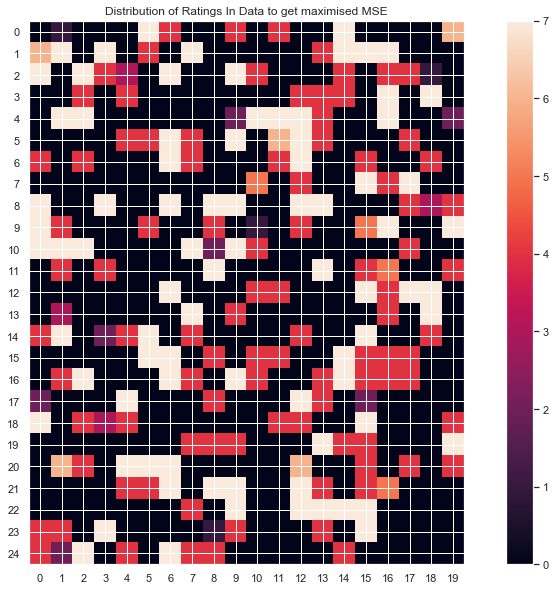

In [80]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.imshow(data_diff)
plt.xticks(range(len(data_diff[0])))
plt.yticks(range(len(data_diff)))
ax = plt.gca()
ax.set_xticklabels(range(len(data_diff[0])))
ax.set_yticklabels(range(len(data_diff)))
plt.title("Distribution of Ratings In Data to get maximised MSE")
plt.colorbar();

#### 4) Repeat #3 with the difference that now you use four latent factors. Use the same rating values as used in #3 above. Compare the predicted outcomes and the MSE values with those obtained in #3. Comment on any significant differences observed

In [86]:
MF_ALS_diff_4 = ExplicitMF(tr1_diff, 4, learning='als', verbose=True)
iter_array1 = [1, 5, 50, 100, 200]
MF_ALS_diff_4.calculate_learning_curve(iter_array1, ts1_diff, learning_rate=0.01)

Iteration:=1
Train mse: 14.121328440438328
Test  mse: 30.008752033818908
Iteration:=5
Train mse: 7.197768549810685
Test  mse: 25.898101793434044
Iteration:=50
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
Train mse: 6.563872040029183
Test  mse: 26.640509558479287
Iteration:=100
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
Train mse: 6.558333353486387
Test  mse: 26.68616918831395
Iteration:=200
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
	current iteration:60
	current iteration:70
	current iteration:80
	current iteration:90
	current iteration:100
Train mse: 6.557561177887836
Test  mse: 26.69260718833511


In [82]:
list1_org=[]
list2_pred=[]
predictions_diff_4 = np.zeros((len(ts1_diff), len(ts1_diff[0])),dtype=object)
ts1_diff_pred=ts1_diff.copy();
for u in range(len(ts1_diff)):
    for i in range(len(ts1_diff[0])):
        if ts1_diff[u][i]!=0:
            list1_org.append(round(MF_ALS_diff_4.predict(u,i),2))
            list2_pred.append(ts1_diff[u][i])
            predictions_diff_4[u][i]=str(ts1_diff[u][i])+' | '+str(round(MF_ALS_diff_4.predict(u,i),2))
print("TEST DATA (50 RATINGS) MSE "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA (50 RATINGS) MSE 26.69194


#### Observations:
        * Here I have observed that while increasing the latent features using ALS method, the MSE has been increased for same data. But using SGD, there is improvement in MSE i.e., mse has been decreased.
        * In the models (Like ALS) fitted on the small dataset the RMSE converges towards a fixed point as rank (Latent features) increases. The training time increases exponentially together with increased rank.
        * A lower regularization hyperparameter would bring the prediction accuracy to a lower error for a lower rank which is observed.
        * Here clearly mse has been increased for our data distribution indicating that accuracy is decreased with increase of rank/latent can be understood that it is due overfitting.

In [83]:
MF_SGD_diff_4 = ExplicitMF(tr1_diff, 4, learning='sgd', verbose=True)
iter_array1 = [1, 5, 50, 100, 200]
MF_SGD_diff_4.calculate_learning_curve(iter_array1, ts1_diff, learning_rate=0.01)

Iteration:=1
Train mse: 2.77255911429617
Test  mse: 2.5938338994250913
Iteration:=5
Train mse: 2.406851178803119
Test  mse: 2.590133308754732
Iteration:=50
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
Train mse: 0.4929000458553524
Test  mse: 3.9395923003121367
Iteration:=100
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
Train mse: 0.12744352389415836
Test  mse: 5.052623747293263
Iteration:=200
	current iteration:10
	current iteration:20
	current iteration:30
	current iteration:40
	current iteration:50
	current iteration:60
	current iteration:70
	current iteration:80
	current iteration:90
	current iteration:100
Train mse: 0.020419337491665565
Test  mse: 6.032602849472082


In [85]:
list1_org=[]
list2_pred=[]
sgd_predictions_diff_4 = np.zeros((len(ts1_diff), len(ts1_diff[0])),dtype=object)
ts1_diff_pred=ts1_diff.copy();
for u in range(len(ts1_diff)):
    for i in range(len(ts1_diff[0])):
        if ts1_diff[u][i]!=0:
            list1_org.append(round(MF_SGD_diff_4.predict(u,i),2))
            list2_pred.append(ts1_diff[u][i])
            sgd_predictions_diff_4[u][i]=str(ts1_diff[u][i])+' | '+str(round(MF_SGD_diff_4.predict(u,i),2))
print("TEST DATA (50 RATINGS) MSE "+str(mean_squared_error(list2_pred,list1_org)))

TEST DATA (50 RATINGS) MSE 6.03285


#### Observation:
    *  Here I have observed that SGD tends to overfit more than ALS and is more susceptible to popularity bias as mse for 4 latents features using sgd is decreased compared with sgd of 2 latent features.